In [1]:
%load_ext autoreload
%autoreload 2
import gym
import matplotlib.pyplot as plt
from dynamic_programming_env import dynamic_programming_env
from visualization_and_metrics import visualisation_value_RM, visualize_policy_RM, average_n_episodes, v_to_q, extract_policy_RM, difference_between_policies, visualizing_epsilon_decay, plot_evolution_difference_between_policies, q_to_policy_RM, reshape_matrix_of_visits, from_microtimes_to_DCP
from value_iteration import value_iteration
from policy_iteration import policy_iteration
from q_learning import q_learning, q_to_v
from dynamic_programming_env_DCP import dynamic_programming_env_DCP
from mpl_toolkits.mplot3d import Axes3D

## RM game without DCP
### First environment
Low probability to get a non-zero reward

In [2]:
micro_times = 50
capacity = 10
actions = tuple(k for k in range(50, 231, 20))
alpha = 0.4
lamb = 0.2

env = gym.make('gym_RM:RM-v0', micro_times=micro_times, capacity=capacity, actions=actions, alpha=alpha, lamb=lamb)
print(env.P)

{(0, 0): {50: [(0.2, (1, 1), 50, False), (0.8, (1, 0), 0, False)], 70: [(0.1704287577932423, (1, 1), 70, False), (0.8295712422067577, (1, 0), 0, False)], 90: [(0.14522980741473818, (1, 1), 90, False), (0.8547701925852618, (1, 0), 0, False)], 110: [(0.12375667836122817, (1, 1), 110, False), (0.8762433216387718, (1, 0), 0, False)], 130: [(0.10545848480860971, (1, 1), 130, False), (0.8945415151913902, (1, 0), 0, False)], 150: [(0.08986579282344431, (1, 1), 150, False), (0.9101342071765557, (1, 0), 0, False)], 170: [(0.07657857719502242, (1, 1), 170, False), (0.9234214228049775, (1, 0), 0, False)], 190: [(0.0652559589246079, (1, 1), 190, False), (0.9347440410753921, (1, 0), 0, False)], 210: [(0.05560746009063882, (1, 1), 210, False), (0.9443925399093612, (1, 0), 0, False)], 230: [(0.04738555173642436, (1, 1), 230, False), (0.9526144482635757, (1, 0), 0, False)]}, (0, 1): {50: [(0.2, (1, 2), 50, False), (0.8, (1, 1), 0, False)], 70: [(0.1704287577932423, (1, 2), 70, False), (0.8295712422067

#### Dynamic Programming   

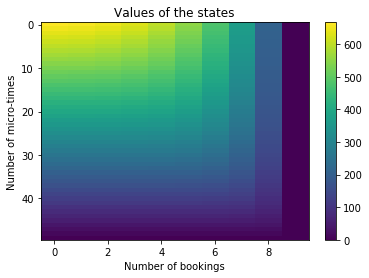

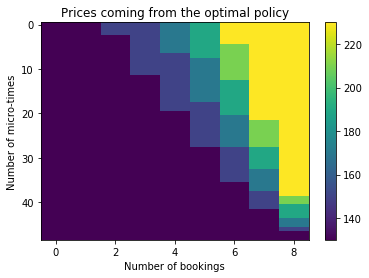

Average reward over 1000 episodes : 671.65


In [14]:
V_ref, P_ref = dynamic_programming_env(env)
V_ref = V_ref.reshape(env.T*env.C)
visualisation_value_RM(V_ref, env.T, env.C)
P_ref = P_ref.reshape(env.T * env.C)
visualize_policy_RM(P_ref, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, P_ref, 1000)))

Q-table computed from the DP values

In [4]:
gamma = 1
Q_ref = v_to_q(env, V_ref, gamma)

#### Value Iteration

Parameters

In [7]:
max_iter = 100000
epsilon = 1e-20
gamma = 0.99

Converged at 9
Average reward over 1000 episodes : 609.08


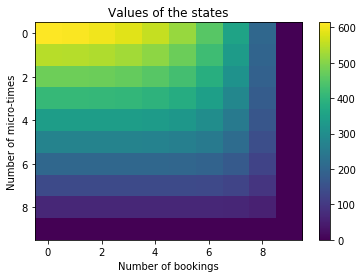

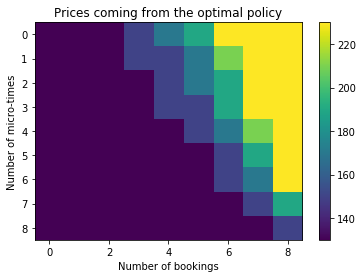

In [8]:
v = value_iteration(env, max_iter, epsilon)
visualisation_value_RM(v, env.T, env.C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))

#### Policy Iteration

Converged at 3
Average reward over 1000 episodes : 681.6
Difference with the optimal policy coming from DP : 4170.0


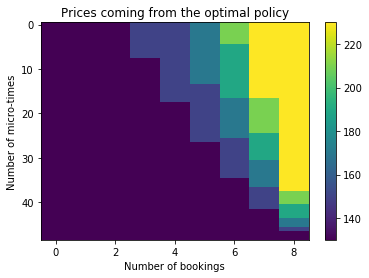

In [48]:
policy = policy_iteration(env, gamma, max_iter, epsilon)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
print("Difference with the optimal policy coming from DP : "+str(difference_between_policies(policy, P_ref)))


#### Q-Learning

Parameters

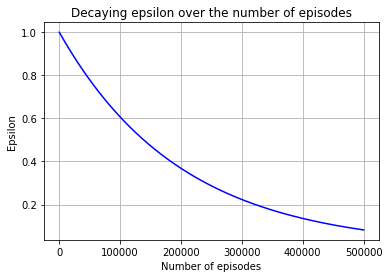

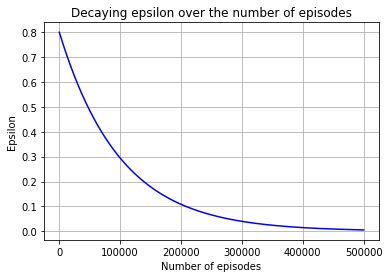

In [12]:
alpha, alpha_min, alpha_decay, gamma = 0.8, 0, 0.99999, 1
nb_episodes = 500000
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.999995
temp = 100

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
visualizing_epsilon_decay(nb_episodes, alpha, alpha_min, alpha_decay)

Average reward over 1000 episodes after 0 episodes : 411.65
Difference with the optimal policy after 0 episodes : 49810.0
Average reward over 1000 episodes after 50000 episodes : 609.7
Difference with the optimal policy after 50000 episodes : 23730.0
Average reward over 1000 episodes after 100000 episodes : 624.24
Difference with the optimal policy after 100000 episodes : 22750.0
Average reward over 1000 episodes after 150000 episodes : 595.81
Difference with the optimal policy after 150000 episodes : 22470.0
Average reward over 1000 episodes after 200000 episodes : 600.32
Difference with the optimal policy after 200000 episodes : 21250.0
Average reward over 1000 episodes after 250000 episodes : 614.22
Difference with the optimal policy after 250000 episodes : 20950.0
Average reward over 1000 episodes after 300000 episodes : 609.71
Difference with the optimal policy after 300000 episodes : 21070.0
Average reward over 1000 episodes after 350000 episodes : 618.53
Difference with the opti

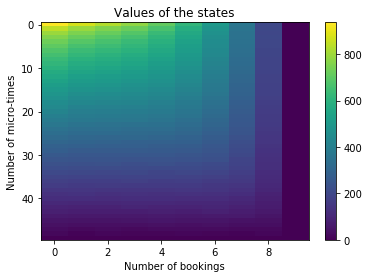

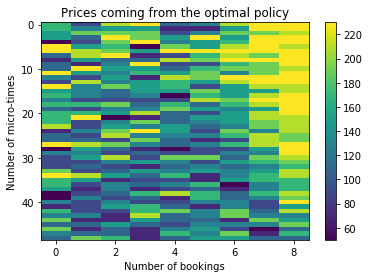

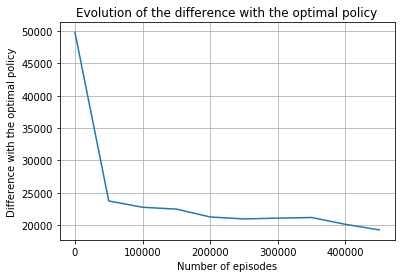

In [15]:
q_table, nb_episodes_list, diff_with_policy_opt_list, M, trajectories = q_learning(env, alpha, alpha_min, alpha_decay, gamma,
                                                                         nb_episodes, epsilon,
                                                                         epsilon_min, epsilon_decay, P_ref, temp)
v = q_to_v(env, q_table)
visualisation_value_RM(v, env.T, env.C)
policy = q_to_policy_RM(env, q_table)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
plot_evolution_difference_between_policies(nb_episodes_list, diff_with_policy_opt_list)


### Second environment 
High probability to get a non-zero reward

In [14]:
micro_times = 50
capacity = 10
actions = tuple(k for k in range(50, 231, 20))
alpha = 0.7
lamb = 0.8

env = gym.make('gym_RM:RM-v0', micro_times=micro_times, capacity=capacity, actions=actions, alpha=alpha, lamb=lamb)
print(env.P)

{(0, 0): {50: [(0.8, (1, 1), 50, False), (0.19999999999999996, (1, 0), 0, False)], 70: [(0.6046269931645805, (1, 1), 70, False), (0.39537300683541954, (1, 0), 0, False)], 90: [(0.4569672510790519, (1, 1), 90, False), (0.5430327489209481, (1, 0), 0, False)], 110: [(0.34536841874326374, (1, 1), 110, False), (0.6546315812567363, (1, 0), 0, False)], 130: [(0.2610238356984316, (1, 1), 130, False), (0.7389761643015684, (1, 0), 0, False)], 150: [(0.1972775711532852, (1, 1), 150, False), (0.8027224288467147, (1, 0), 0, False)], 170: [(0.14909918083152798, (1, 1), 170, False), (0.850900819168472, (1, 0), 0, False)], 190: [(0.11268673673683603, (1, 1), 190, False), (0.887313263263164, (1, 0), 0, False)], 210: [(0.08516680350340228, (1, 1), 210, False), (0.9148331964965977, (1, 0), 0, False)], 230: [(0.06436768539962598, (1, 1), 230, False), (0.935632314600374, (1, 0), 0, False)]}, (0, 1): {50: [(0.8, (1, 2), 50, False), (0.19999999999999996, (1, 1), 0, False)], 70: [(0.6046269931645805, (1, 2), 

#### Dynamic Programming  

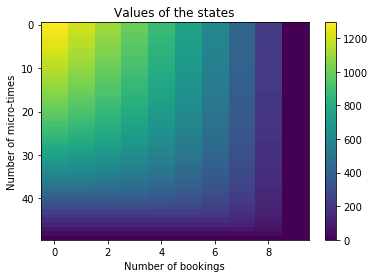

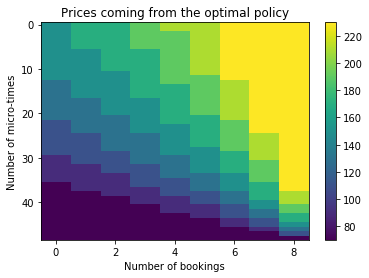

Average reward over 1000 episodes : 1288.03


In [16]:
V_ref, P_ref = dynamic_programming_env(env)
V_ref = V_ref.reshape(env.T*env.C)
visualisation_value_RM(V_ref, env.T, env.C)
P_ref = P_ref.reshape(env.T * env.C)
visualize_policy_RM(P_ref, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, P_ref, 1000)))

#### Q-Learning 
Produces an optimal policy closer to the DP optimal policy on the second environment than on the first

Average reward over 1000 episodes after 0 episodes : 453.22
Difference with the optimal policy after 0 episodes : 48530.0
Average reward over 1000 episodes after 50000 episodes : 1175.59
Difference with the optimal policy after 50000 episodes : 19530.0
Average reward over 1000 episodes after 100000 episodes : 1199.79
Difference with the optimal policy after 100000 episodes : 16650.0
Average reward over 1000 episodes after 150000 episodes : 1233.98
Difference with the optimal policy after 150000 episodes : 15270.0
Average reward over 1000 episodes after 200000 episodes : 1220.72
Difference with the optimal policy after 200000 episodes : 14890.0
Average reward over 1000 episodes after 250000 episodes : 1226.66
Difference with the optimal policy after 250000 episodes : 14530.0
Average reward over 1000 episodes after 300000 episodes : 1236.2
Difference with the optimal policy after 300000 episodes : 13270.0
Average reward over 1000 episodes after 350000 episodes : 1244.06
Difference with t

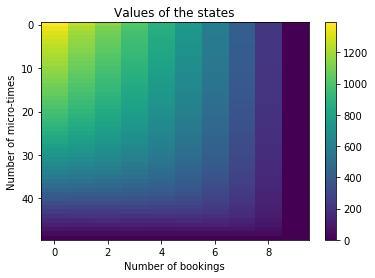

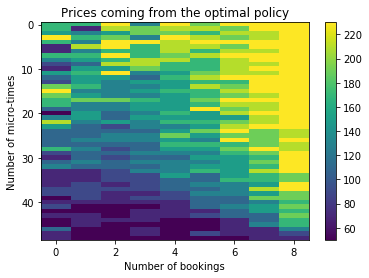

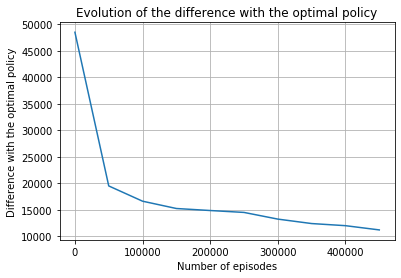

In [17]:
q_table, nb_episodes_list, diff_with_policy_opt_list, M, trajectories = q_learning(env, alpha, alpha_min, alpha_decay, gamma,
                                                                         nb_episodes, epsilon,
                                                                         epsilon_min, epsilon_decay, P_ref, temp)
v = q_to_v(env, q_table)
visualisation_value_RM(v, env.T, env.C)
policy = q_to_policy_RM(env, q_table)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
plot_evolution_difference_between_policies(nb_episodes_list, diff_with_policy_opt_list)


## RM game with DCP
It is now possible to have more than one person buying a ticket when we take an action $a$ in a state $(\tau, x)$.

In [4]:
data_collection_points = 10
micro_times = 5
capacity = 10
actions = tuple(k for k in range(50, 231, 20))
alpha = 0.4
lamb = 0.2

env = gym.make('gym_RMDCP:RMDCP-v0', data_collection_points=data_collection_points, capacity=capacity,
                micro_times=micro_times, actions=actions, alpha=alpha, lamb=lamb)
print(env.P.keys())    

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)])


#### Dynamic Programming

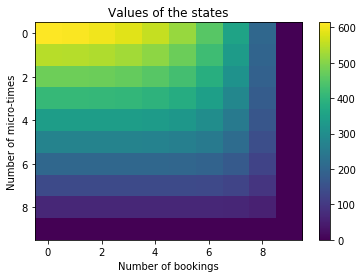

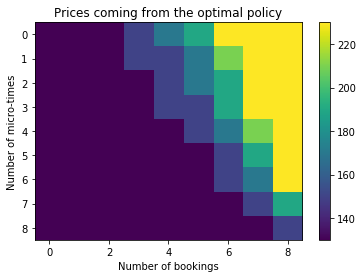

Average reward over 1000 episodes : 636.93


In [10]:
V, P_ref = dynamic_programming_env_DCP(env)
V = V.reshape(env.T * env.C)
visualisation_value_RM(V, env.T, env.C)
visualize_policy_RM(P_ref, env.T, env.C)
P_ref = P_ref.reshape(env.T * env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, P_ref, 1000)))


#### Value Iteration

Converged at 9
Average reward over 1000 episodes : 599.06


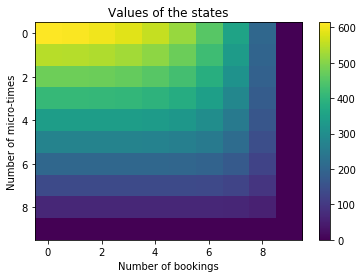

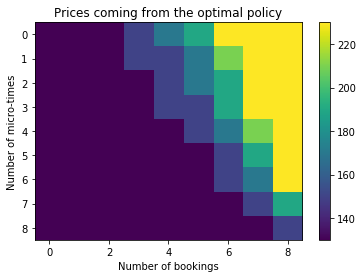

In [9]:
v = value_iteration(env, max_iter, epsilon)
visualisation_value_RM(v, env.T, env.C)
policy = extract_policy_RM(env, v, gamma)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))

#### Q-Learning

Average reward over 1000 episodes after 0 episodes : 344.9
Difference with the optimal policy after 0 episodes : 9510.0
Average reward over 1000 episodes after 50000 episodes : 466.69
Difference with the optimal policy after 50000 episodes : 4090.0
Average reward over 1000 episodes after 100000 episodes : 446.27
Difference with the optimal policy after 100000 episodes : 3850.0
Average reward over 1000 episodes after 150000 episodes : 470.67
Difference with the optimal policy after 150000 episodes : 4050.0
Average reward over 1000 episodes after 200000 episodes : 458.95
Difference with the optimal policy after 200000 episodes : 3830.0
Average reward over 1000 episodes after 250000 episodes : 457.59
Difference with the optimal policy after 250000 episodes : 3570.0
Average reward over 1000 episodes after 300000 episodes : 481.08
Difference with the optimal policy after 300000 episodes : 3510.0
Average reward over 1000 episodes after 350000 episodes : 488.25
Difference with the optimal pol

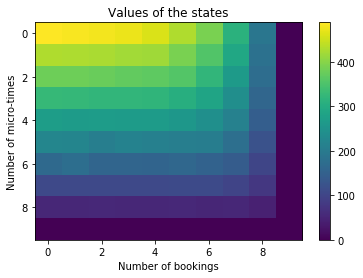

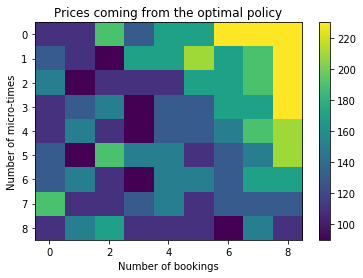

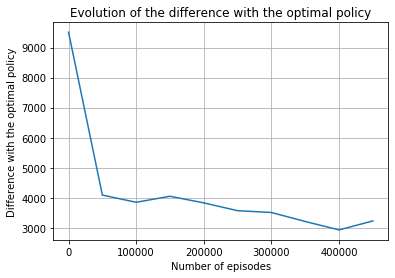

In [20]:
q_table, nb_episodes_list, diff_with_policy_opt_list, M, trajectories = q_learning(env, alpha, alpha_min, alpha_decay, gamma,
                                                                         nb_episodes, epsilon,
                                                                         epsilon_min, epsilon_decay, P_ref, temp)

v = q_to_v(env, q_table)
visualisation_value_RM(v, env.T, env.C)
policy = q_to_policy_RM(env, q_table)
visualize_policy_RM(policy, env.T, env.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env, policy, 1000)))
plot_evolution_difference_between_policies(nb_episodes_list, diff_with_policy_opt_list)

Visualization of the states visited

In [ ]:
X, Y, Z, values = reshape_matrix_of_visits(M, env)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter3D(X, Y, Z, c=values, cmap='hot')
fig.colorbar(p, ax=ax)
plt.show()

plt.imshow(trajectories, aspect = 'auto')
plt.colorbar()
plt.show()


## Extracting DCP policies from micro-times policies
Parameters common to both games

In [11]:
capacity = 10
actions = tuple(k for k in range(50, 231, 20))
alpha = 0.4
lamb = 0.2

Parameters specific to the RM game without DCP

In [12]:
data_collection_points = 50
env_MT = gym.make('gym_RM:RM-v0', micro_times=data_collection_points, capacity=capacity, actions=actions, alpha=alpha, lamb=lamb)

Parameters specific to the RM game with DCP

In [13]:
data_collection_points = 10
micro_times = 5
env_DCP = gym.make('gym_RMDCP:RMDCP-v0', data_collection_points=data_collection_points, capacity=capacity,
                   micro_times=micro_times, actions=actions, alpha=alpha, lamb=lamb)

#### Policy produced by DP on the RM game without DCP

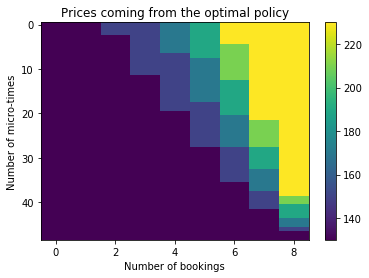

Average reward over 1000 episodes : 661.67


In [21]:
V, P_ref_MT = dynamic_programming_env(env_MT)
visualize_policy_RM(P_ref, env_MT.T, env_MT.C)
P_ref_MT = P_ref.reshape(env_MT.T * env_MT.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env_MT, P_ref_MT, 1000)))

#### Policy produced by DP on the RM game with DCP

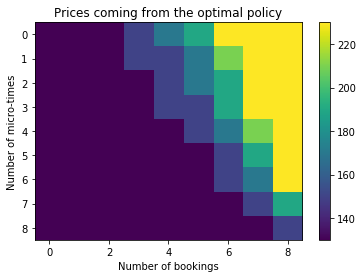

Average reward over 1000 episodes : 606.34


In [16]:
V, P_ref = dynamic_programming_env_DCP(env_DCP)
visualize_policy_RM(P_ref, env_DCP.T, env_DCP.C)
P_ref = P_ref.reshape(env_DCP.T * env_DCP.C)
print("Average reward over 1000 episodes : " + str(average_n_episodes(env_DCP, P_ref, 1000)))

#### Policy extracted from the RM game without DCP using the median

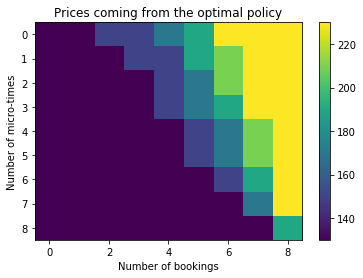

In [31]:
policy_DCP = from_microtimes_to_DCP(P_ref_MT, env_MT, env_DCP, "median")
visualize_policy_RM(policy_DCP, env_DCP.T, env_DCP.C)

#### Policy extracted from the RM game without DCP using the mean

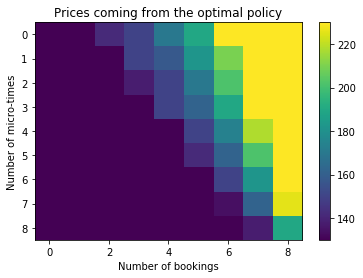

In [30]:
policy_DCP = from_microtimes_to_DCP(P_ref_MT, env_MT, env_DCP, "mean")
visualize_policy_RM(policy_DCP, env_DCP.T, env_DCP.C)

## Finding an environment using DCP advantageous to Q-Learning

In [33]:
data_collection_points = 10
micro_times = 5
capacity = 10
actions = tuple(k for k in range(50, 231, 50))
alpha = 0.4
lamb = 0.2

env_DCP = gym.make('gym_RMDCP:RMDCP-v0', data_collection_points=data_collection_points, capacity=capacity,
                   micro_times=micro_times, actions=actions, alpha=alpha, lamb=lamb)
print(env.P)

{(0, 0): {50: [(0.3276800000000001, (1, 0), 0, False), (0.4096000000000001, (1, 1), 50, False), (0.2048000000000001, (1, 2), 100, False), (0.05120000000000002, (1, 3), 150, False), (0.006400000000000001, (1, 4), 200, False), (0.0003200000000000001, (1, 5), 250, False)], 70: [(0.3928877086426006, (1, 0), 0, False), (0.4035781421139424, (1, 1), 70, False), (0.16582378446489382, (1, 2), 140, False), (0.034067166460288845, (1, 3), 210, False), (0.0034994130497568356, (1, 4), 280, False), (0.00014378526851751102, (1, 5), 350, False)], 90: [(0.45629619318338666, (1, 0), 0, False), (0.3876352312875681, (1, 1), 90, False), (0.1317223985473629, (1, 2), 180, False), (0.022380306121089644, (1, 3), 270, False), (0.001901263974834104, (1, 4), 360, False), (6.460688575828971e-05, (1, 5), 450, False)], 110: [(0.5165633678413244, (1, 0), 0, False), (0.3647854710468523, (1, 1), 110, False), (0.10304132903806627, (1, 2), 220, False), (0.014553095356924655, (1, 3), 330, False), (0.001027706971779741, (1,